In [20]:
include("utils.jl")
include("algorithm.jl")
using Plots
using Concorde

## GIF

In [21]:
function plot_tour(tour, X, Y, n)
    tour_edges = [(tour[k], tour[mod1(k+1, n)]) for k in 1:n]
    plot = Plots.plot()
    for (i, j) in tour_edges
        Plots.plot!([X[i], X[j]], [Y[i], Y[j]]; color = :red, legend = false)
        Plots.scatter!([X[i]], [Y[i]]; color = :blue, legend = false)
    end
    xlims!(0, 1) 
    ylims!(0, 1)  
    xlabel!("X")
    ylabel!("Y")
    return plot
end

plot_tour (generic function with 2 methods)

# Algorithm

In [22]:
function genetic_algorithm_with_2opt(X, Y, adj, opt_len, n; population_size=100, generations=10, mutation_rate=0.1, crossover_rate=0.8, tournament_size = 20)
    population = [shuffle(1:n) for _ in 1:population_size]
    scores = [sum([adj[population[i][k], population[i][mod1(k+1, n)]] for k in 1:n]) for i in 1:population_size]
    best_tour_length_info = []

    # Apply 2-opt to each tour in the initial population
    for i in 1:population_size
        population[i], scores[i] = two_opt(X, Y, adj, n, population[i])
    end
    
    for gen in 1:generations
        new_population = []
        new_scores = []
        
        while length(new_population) < population_size
            # Selection
            parent1, parent2 = select_two_parents(population, scores, tournament_size)

            # Crossover
            if rand() < crossover_rate
                child1, child2 = ordered_crossover(parent1, parent2)
            else
                child1, child2 = parent1, parent2
            end

            # Mutation
            mutate!(child1, mutation_rate)
            mutate!(child2, mutation_rate)
            
            # Apply 2-opt to each child
            tour1, score1 = two_opt(X, Y, adj, n, child1)
            #println("Population ", length(new_population)+1, " score: ", score1)
            tour2, score2 = two_opt(X, Y, adj, n, child2)
            #println("Population ", length(new_population)+2, " score: ", score2)
            
            push!(new_population, tour1)
            push!(new_population, tour2)

            push!(new_scores, score1)
            push!(new_scores, score2)
        end
        
        # Replacement strategy
        population = new_population
        scores = new_scores
        
        best_tour = population[argmin(scores)]
        best_tour_length = minimum(scores)
        println("Generation $gen best tour length: ", best_tour_length)
        gap = optimal_check(best_tour_length, opt_len)
        if gap < 0.05
            break
        end
        push!(best_tour_length_info, gap)
    end
    
    # Find the best tour in the final population
    best_tour = population[argmin(scores)]
    best_tour_length = minimum(scores)
    return best_tour, best_tour_length, best_tour_length_info
end

genetic_algorithm_with_2opt (generic function with 1 method)

## GA Plot

In [23]:
function experiment_ga(city_size, rng)
    n = city_size
    X, Y, adj = generate_distance_matrix(n, rng)
    opt_tour, opt_len = solve_tsp(100X, 100Y; dist="EUC_2D")
    println("Optimal tour: ", opt_tour)
    println("Optimal tour length: ", opt_len/100)

    ga_tour, ga_tour_length, ga_info = genetic_algorithm_with_2opt(X, Y, adj, opt_len, n)
    gap = optimal_check(ga_tour_length, opt_len)
    println("---------------<GA>-----------------")
    println("Final tour:", ga_tour)
    println("Tour length: ", ga_tour_length)
    println("Optimality Gap: $gap%")
    plot(ga_info, label="Optimality Gap(%)", xlabel="Generation", ylabel="Optimality Gap", title="Solving TSP by Genetic Algorithm")
end

experiment_ga (generic function with 1 method)

Optimal tour: [1, 13, 43, 16, 47, 17, 38, 6, 4, 41, 10, 45, 30, 39, 28, 40, 35, 33, 5, 22, 15, 49, 27, 37, 7, 29, 46, 26, 25, 20, 50, 11, 36, 31, 21, 8, 23, 9, 34, 3, 12, 32, 2, 19, 14, 44, 48, 24, 18, 42]
Optimal tour length: 6.02
Generation 1 best tour length: 6.04
Generation 2 best tour length: 6.029999999999999
Generation 3 best tour length: 6.029999999999999
Generation 4 best tour length: 6.02
---------------<GA>-----------------
Final tour:[7, 29, 46, 26, 25, 20, 50, 11, 36, 31, 21, 8, 23, 9, 34, 3, 12, 32, 2, 19, 14, 44, 48, 24, 18, 42, 1, 13, 43, 16, 47, 17, 38, 6, 4, 41, 10, 45, 30, 39, 28, 40, 35, 33, 5, 22, 15, 49, 27, 37]
Tour length: 6.02
Optimality Gap: 0.0%


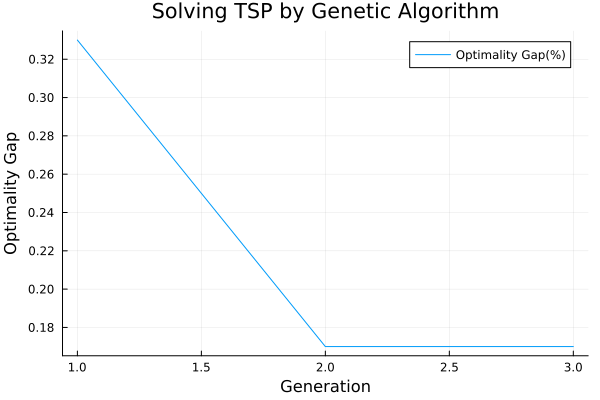

In [24]:
experiment_ga(50, 2)

Optimal tour: [1, 79, 90, 69, 71, 36, 72, 30, 16, 60, 80, 34, 81, 29, 65, 5, 74, 78, 48, 62, 9, 23, 83, 59, 75, 26, 4, 32, 3, 68, 37, 42, 43, 97, 61, 85, 2, 54, 24, 52, 51, 100, 77, 95, 53, 8, 63, 44, 40, 41, 19, 94, 46, 99, 14, 31, 84, 64, 73, 45, 28, 87, 18, 70, 10, 25, 57, 96, 39, 15, 33, 50, 6, 12, 47, 22, 49, 91, 66, 93, 82, 11, 38, 58, 67, 89, 86, 21, 35, 17, 27, 76, 88, 13, 56, 20, 7, 98, 55, 92]
Optimal tour length: 7.67
Generation 1 best tour length: 7.740000000000001
Generation 2 best tour length: 7.710000000000001
Generation 3 best tour length: 7.67
---------------<GA>-----------------
Final tour:[86, 89, 67, 58, 38, 11, 82, 93, 66, 91, 49, 22, 47, 12, 6, 50, 33, 15, 39, 96, 57, 25, 10, 70, 18, 87, 28, 45, 73, 64, 84, 31, 14, 99, 46, 94, 19, 41, 40, 44, 63, 8, 53, 95, 77, 100, 51, 52, 24, 54, 2, 85, 61, 97, 43, 42, 37, 68, 3, 32, 4, 26, 75, 59, 83, 23, 9, 62, 48, 78, 74, 5, 65, 29, 60, 80, 34, 81, 16, 30, 72, 36, 71, 69, 90, 79, 92, 1, 55, 98, 7, 20, 56, 13, 88, 76, 27, 17, 

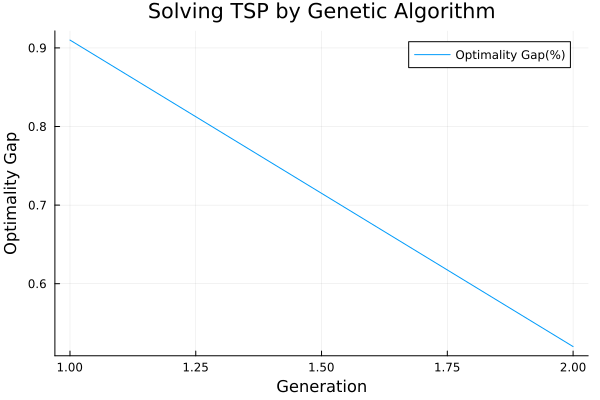

In [25]:
experiment_ga(100, 2)